In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [6]:
x = df.drop(columns='num')
y = df.num

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

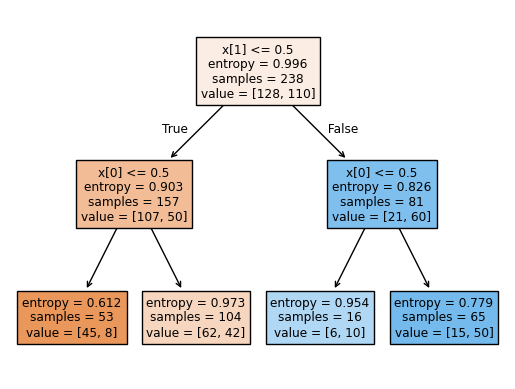

In [22]:
tree.plot_tree(clf, filled=True)

In [26]:
IG = 0.996 - ((0.903*157 + 81*0.826)/238)

In [28]:
IG

0.11920588235294105

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [35]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [40]:
x = df.drop('class', axis=1)
y = df['class']

In [37]:
dt = RandomForestClassifier(random_state=0)

In [46]:
params = {'n_estimators':range(10,50,20), 'max_depth':range(1,12,2), 'min_samples_leaf':range(1,8),'min_samples_split':range(2,9,2)}

In [47]:
search = GridSearchCV(dt, params, cv=3, n_jobs=-1)

In [48]:
search.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 20)})

In [55]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [60]:
clf = search.best_estimator_

In [61]:
clf.fit(x,y)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

NameError: name 'plt' is not defined

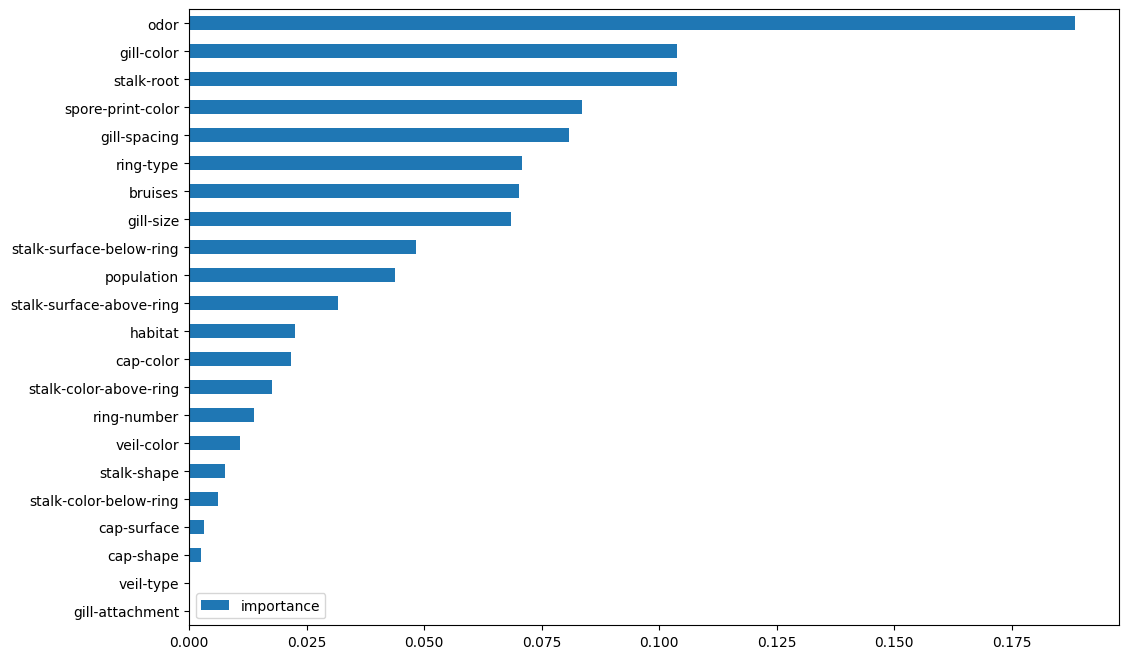

In [64]:
imp = pd.DataFrame(clf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

In [65]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [67]:
predictions = clf.predict(test)

In [68]:
predictions.sum()

np.int64(976)

In [74]:
import requests, zipfile, io 
import pandas as pd

url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
txtfiles = z.namelist()
right_mush = pd.read_csv(z.open(txtfiles[0], "r", pwd='Cool!Move_forward!'.encode('cp850', 'replace')))

In [76]:
from sklearn.metrics import confusion_matrix

<Axes: >

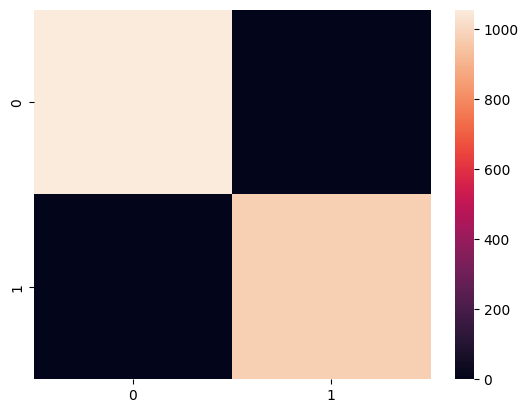

In [79]:
sns.heatmap(confusion_matrix(right_mush, predictions))

In [80]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [85]:
x = df.drop('class', axis=1)
y = df['class']

In [94]:
dt = RandomForestClassifier()

In [95]:
search = GridSearchCV(dt, params, cv=3)

In [96]:
search.fit(x,y)

/Users/sergejknol/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 20)})

In [97]:
best_tree = search.best_estimator_

In [98]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [99]:
predictions = best_tree.predict(test)

In [100]:
pd.Series(predictions).value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

In [105]:
best_tree.feature_importances_

array([0.19907367, 0.03744112, 0.17317012, 0.30449314, 0.        ,
       0.28582194])

NameError: name 'plt' is not defined

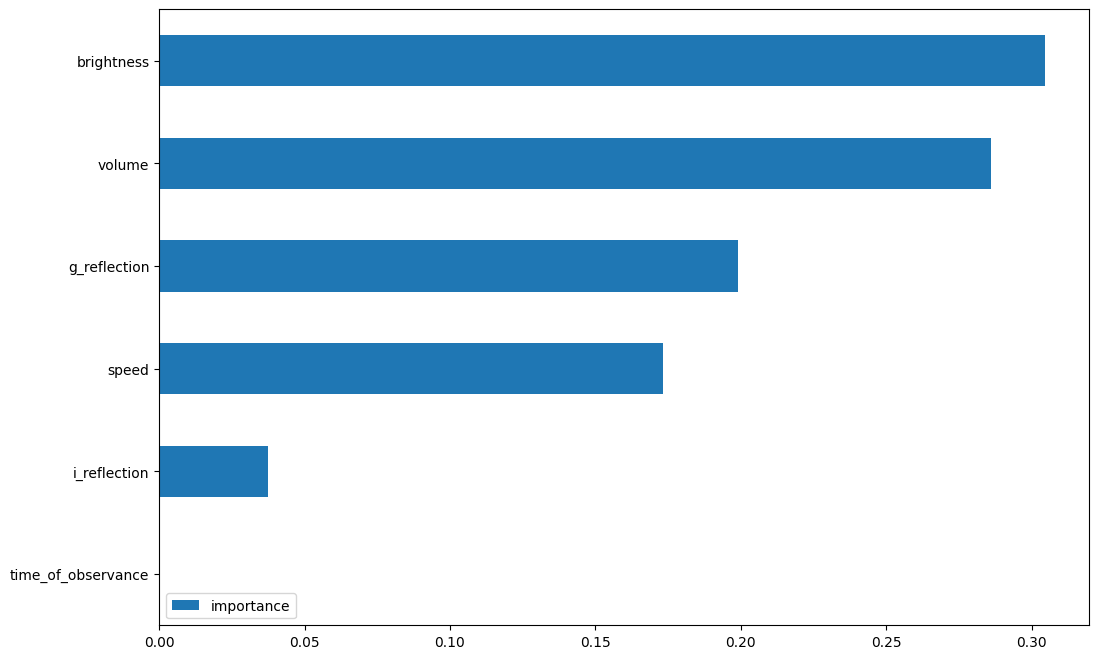

In [107]:
imp = pd.DataFrame(best_tree.feature_importances_, index=test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

In [4]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [7]:
df.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


In [110]:
x = df.drop('dangerous', axis=1)
y = df.dangerous

In [111]:
search.fit(x,y)

KeyboardInterrupt: 

In [ ]:
best_tree = search.best_estimator_